# 🧩 Notebook-13: Comparative Plotting

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
from pathlib import Path

# ✅ Setup path to use utils
PROJECT_ROOT = Path.cwd().parent
UTILS_DIR = PROJECT_ROOT / "utils"
if str(UTILS_DIR) not in sys.path:
    sys.path.insert(0, str(UTILS_DIR))

from plot_utils import grouped_bar_plot, stacked_area_plot, subplot_groupwise

print("🔀 Comparative Plotting for Multi-Group Analysis")

🔀 Comparative Plotting for Multi-Group Analysis


In [2]:
# 📂 1. Load and Prepare Data
df = pd.read_csv(PROJECT_ROOT / "datasets" / "sales_data.csv")

# 🧼 Convert Month to short categorical form
df["Month"] = pd.to_datetime(df["Month"]).dt.strftime("%b")  # Jan, Feb, ...
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
               "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
df["Month"] = pd.Categorical(df["Month"], categories=month_order, ordered=True)
df = df.sort_values("Month")

In [3]:
# ✅ Quick check for required columns
assert {"Month", "Product", "Revenue", "Units Sold"}.issubset(df.columns)

/Users/satvikpraveen/Desktop/Libraries/MatplotlibMasterPro/utils/plot_utils.py:732: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_df = df.groupby([category, subcategory])[value].sum().reset_index()
/Users/satvikpraveen/Desktop/Libraries/MatplotlibMasterPro/utils/plot_utils.py:754: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/satvikpraveen/Desktop/Libraries/MatplotlibMasterPro/mp_py_env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


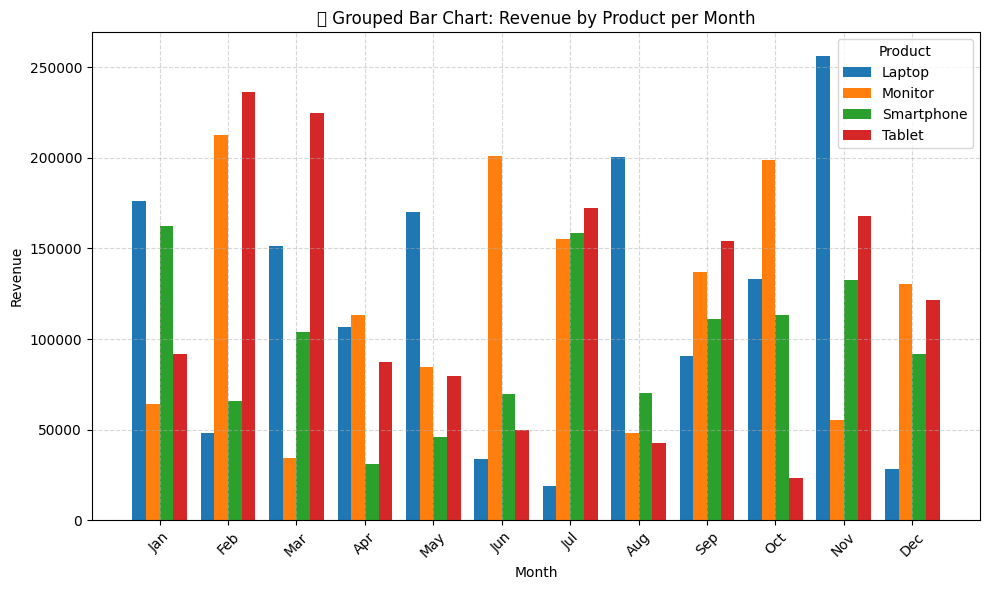

In [4]:
# 🔁 2. Grouped Bar Plot – Monthly Revenue by Product
grouped_bar_plot(
    df=df,
    category="Month",
    subcategory="Product",
    value="Revenue",
    title="📊 Grouped Bar Chart: Revenue by Product per Month"
)

/var/folders/23/phyj43kx4jz5gywlx6__9_kc0000gn/T/ipykernel_52758/1664493416.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly = df.groupby("Month")[["Units Sold", "Revenue"]].sum()
/Users/satvikpraveen/Desktop/Libraries/MatplotlibMasterPro/utils/plot_utils.py:775: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/satvikpraveen/Desktop/Libraries/MatplotlibMasterPro/mp_py_env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


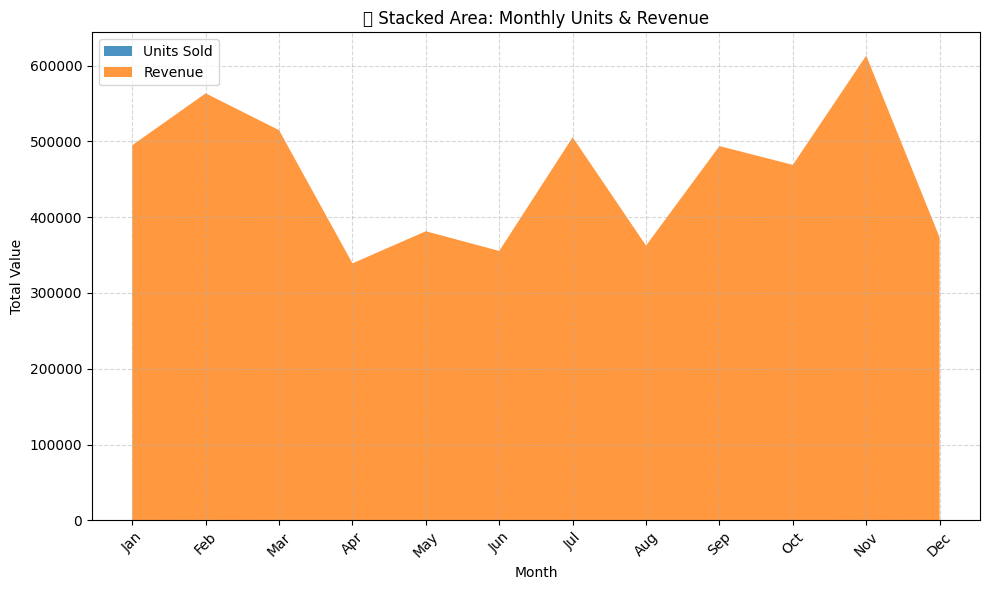

In [5]:
# 🧱 3. Stacked Area Plot – Cumulative Revenue by Month
monthly = df.groupby("Month")[["Units Sold", "Revenue"]].sum()
stacked_area_plot(
    x=monthly.index,
    y_series_dict={
        "Units Sold": monthly["Units Sold"].values,
        "Revenue": monthly["Revenue"].values
    },
    xlabel="Month",
    ylabel="Total Value",
    title="📈 Stacked Area: Monthly Units & Revenue"
)

/Users/satvikpraveen/Desktop/Libraries/MatplotlibMasterPro/utils/plot_utils.py:806: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/satvikpraveen/Desktop/Libraries/MatplotlibMasterPro/mp_py_env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


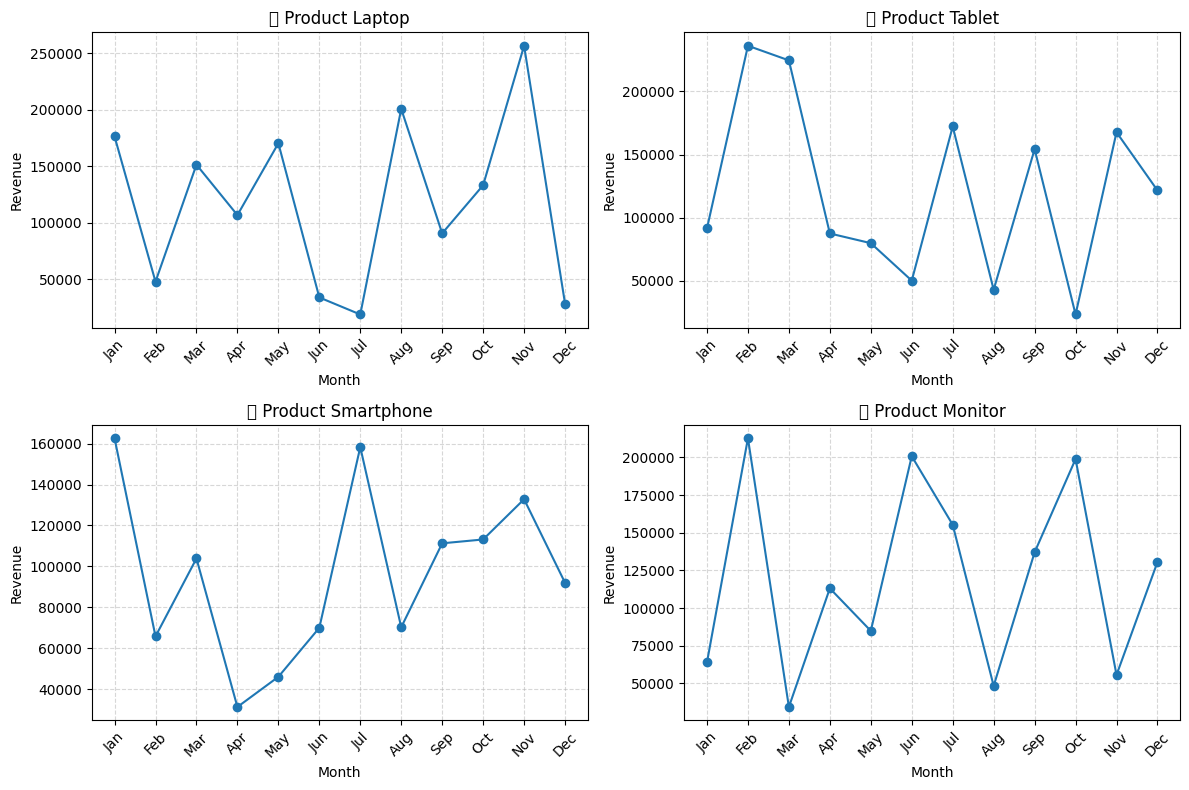

In [6]:
# 🔲 4. Subplot by Product – Revenue Trend by Product
subplot_groupwise(
    df=df,
    group_col="Product",
    x_col="Month",
    y_col="Revenue",
    title_prefix="📍 Product"
)

In [7]:
# 📦 Save Plots for Reports or Docs
from plot_utils import (
    save_grouped_bar_plot,
    save_stacked_area_plot,
    save_subplot_groupwise
)

# 📌 Create output folder if needed
export_dir = PROJECT_ROOT / "exports" / "comparative_plots"
export_dir.mkdir(parents=True, exist_ok=True)

# 💾 Save Grouped Bar Plot
save_grouped_bar_plot(
    df=df,
    category="Month",
    subcategory="Product",
    value="Revenue",
    title="📊 Grouped Bar Chart: Revenue by Product per Month",
    filename=export_dir / "grouped_bar_revenue_product.png"
)

# 💾 Save Stacked Area Plot
monthly = df.groupby("Month")[["Units Sold", "Revenue"]].sum()
save_stacked_area_plot(
    x=monthly.index,
    y_series_dict={
        "Units Sold": monthly["Units Sold"].values,
        "Revenue": monthly["Revenue"].values
    },
    xlabel="Month",
    ylabel="Total Value",
    title="📈 Stacked Area: Units Sold and Revenue Growth",
    filename=export_dir / "stacked_area_units_revenue.png"
)

# 💾 Save Subplots by Product
save_subplot_groupwise(
    df=df,
    group_col="Product",
    x_col="Month",
    y_col="Revenue",
    title_prefix="📍 Product",
    filename_prefix=export_dir / "subplot_product_revenue"
)

/Users/satvikpraveen/Desktop/Libraries/MatplotlibMasterPro/utils/plot_utils.py:815: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_df = df.pivot_table(index=category, columns=subcategory, values=value, aggfunc="sum").fillna(0)
/Users/satvikpraveen/Desktop/Libraries/MatplotlibMasterPro/utils/plot_utils.py:833: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/satvikpraveen/Desktop/Libraries/MatplotlibMasterPro/utils/plot_utils.py:834: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.savefig(filename, dpi=300)
/var/folders/23/phyj43kx4jz5gywlx6__9_kc0000gn/T/ipykernel_52758/363544910.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain 

## ✅ Summary
- Compared categories via side-by-side and stacked formats
- Demonstrated reusable layout utilities for grouped plotting
- Learned to break down data views by subcategories